<a href="https://colab.research.google.com/github/jdv1bjr/Financial-Presentation/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [30]:
customer_df = pd.read_csv('Customers.csv')

customer_df

,column1,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode
0,18635,Greeley,EE. UU.,XXXXXXXXX,Janet,10014,Williams,XXXXXXXXX,Consumer,CO,9890 Pleasant Highway,80631.0
1,18636,Hialeah,EE. UU.,XXXXXXXXX,Mary,4947,Hobbs,XXXXXXXXX,Consumer,FL,4110 Silent Pointe,33016.0
2,18637,Scottsdale,EE. UU.,XXXXXXXXX,Mary,5662,Figueroa,XXXXXXXXX,Consumer,AZ,9030 Clear Glade,85254.0
3,18638,Philadelphia,EE. UU.,XXXXXXXXX,Bruce,5794,Werner,XXXXXXXXX,Consumer,PA,6613 Sleepy Horse Quay,19140.0
4,18639,Tampa,EE. UU.,XXXXXXXXX,Mary,5912,Palmer,XXXXXXXXX,Consumer,FL,1066 Stony Bay,33624.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12714,7916,Brooklyn,EE. UU.,XXXXXXXXX,Marie,4940,Snyder,XXXXXXXXX,Consumer,NY,6534 Red Carrefour,11221.0
12715,7917,Mission Viejo,EE. UU.,XXXXXXXXX,Carol,4880,Banks,XXXXXXXXX,Consumer,CA,4761 Indian Mountain Plaza,92691.0
12716,7918,Cupertino,EE. UU.,XXXXXXXXX,Vincent,11394,Smith,XXXXXXXXX,Consumer,CA,503 Foggy Wagon Place,95014.0
12717,7919,Orlando,EE. UU.,XXXXXXXXX,Mary,1705,Smith,XXXXXXXXX,Consumer,FL,1102 Pleasant Maze,32825.0


In [31]:
order_by_state = customer_df.groupby("Customer_State").count().sort_values(by=["column1"],ascending=False).iloc[0:5,:2]

In [32]:
order_by_state.rename(columns={"column1" : "Number of Customers"}, inplace=True)
order_by_state

,Number of Customers,Customer_City
Customer_State,,
CA,3318,3318
NY,1278,1278
TX,1088,1088
IL,855,855
FL,583,583


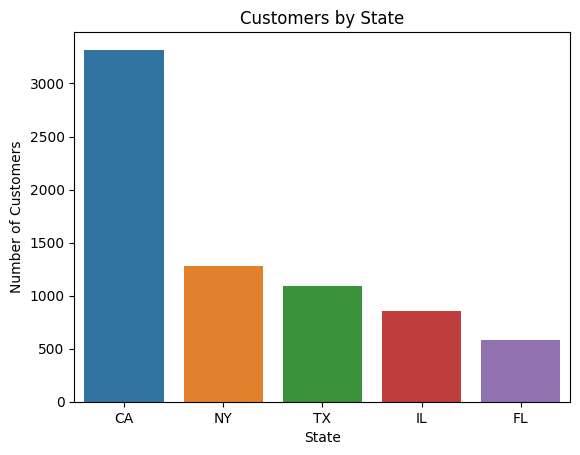

In [33]:
sns.barplot(x="Customer_State", y="Number of Customers", hue= "Customer_State", data = order_by_state)
plt.title('Customers by State')
plt.ylabel('Number of Customers')
plt.xlabel('State')
plt.show()

In [34]:
revised_df = customer_df.drop(columns=['Customer_Country', 'Customer_Email', 'Customer_Password', 'Customer_Street', 'Customer_Zipcode'], inplace=False)

In [35]:
customer_df

,column1,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode
0,18635,Greeley,EE. UU.,XXXXXXXXX,Janet,10014,Williams,XXXXXXXXX,Consumer,CO,9890 Pleasant Highway,80631.0
1,18636,Hialeah,EE. UU.,XXXXXXXXX,Mary,4947,Hobbs,XXXXXXXXX,Consumer,FL,4110 Silent Pointe,33016.0
2,18637,Scottsdale,EE. UU.,XXXXXXXXX,Mary,5662,Figueroa,XXXXXXXXX,Consumer,AZ,9030 Clear Glade,85254.0
3,18638,Philadelphia,EE. UU.,XXXXXXXXX,Bruce,5794,Werner,XXXXXXXXX,Consumer,PA,6613 Sleepy Horse Quay,19140.0
4,18639,Tampa,EE. UU.,XXXXXXXXX,Mary,5912,Palmer,XXXXXXXXX,Consumer,FL,1066 Stony Bay,33624.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12714,7916,Brooklyn,EE. UU.,XXXXXXXXX,Marie,4940,Snyder,XXXXXXXXX,Consumer,NY,6534 Red Carrefour,11221.0
12715,7917,Mission Viejo,EE. UU.,XXXXXXXXX,Carol,4880,Banks,XXXXXXXXX,Consumer,CA,4761 Indian Mountain Plaza,92691.0
12716,7918,Cupertino,EE. UU.,XXXXXXXXX,Vincent,11394,Smith,XXXXXXXXX,Consumer,CA,503 Foggy Wagon Place,95014.0
12717,7919,Orlando,EE. UU.,XXXXXXXXX,Mary,1705,Smith,XXXXXXXXX,Consumer,FL,1102 Pleasant Maze,32825.0


In [36]:
demographics = customer_df['Customer_Segment']
demographics.value_counts()

Customer_Segment
Consumer       6605
Corporate      3852
Home Office    2262
Name: count, dtype: int64

In [37]:
consumer_by_state = customer_df[customer_df["Customer_Segment"] == 'Consumer']
consumer_by_state

,column1,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode
0,18635,Greeley,EE. UU.,XXXXXXXXX,Janet,10014,Williams,XXXXXXXXX,Consumer,CO,9890 Pleasant Highway,80631.0
1,18636,Hialeah,EE. UU.,XXXXXXXXX,Mary,4947,Hobbs,XXXXXXXXX,Consumer,FL,4110 Silent Pointe,33016.0
2,18637,Scottsdale,EE. UU.,XXXXXXXXX,Mary,5662,Figueroa,XXXXXXXXX,Consumer,AZ,9030 Clear Glade,85254.0
3,18638,Philadelphia,EE. UU.,XXXXXXXXX,Bruce,5794,Werner,XXXXXXXXX,Consumer,PA,6613 Sleepy Horse Quay,19140.0
4,18639,Tampa,EE. UU.,XXXXXXXXX,Mary,5912,Palmer,XXXXXXXXX,Consumer,FL,1066 Stony Bay,33624.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12714,7916,Brooklyn,EE. UU.,XXXXXXXXX,Marie,4940,Snyder,XXXXXXXXX,Consumer,NY,6534 Red Carrefour,11221.0
12715,7917,Mission Viejo,EE. UU.,XXXXXXXXX,Carol,4880,Banks,XXXXXXXXX,Consumer,CA,4761 Indian Mountain Plaza,92691.0
12716,7918,Cupertino,EE. UU.,XXXXXXXXX,Vincent,11394,Smith,XXXXXXXXX,Consumer,CA,503 Foggy Wagon Place,95014.0
12717,7919,Orlando,EE. UU.,XXXXXXXXX,Mary,1705,Smith,XXXXXXXXX,Consumer,FL,1102 Pleasant Maze,32825.0


<ipython-input-38-9ea4dc4fe5cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(demographics, palette='gist_stern')


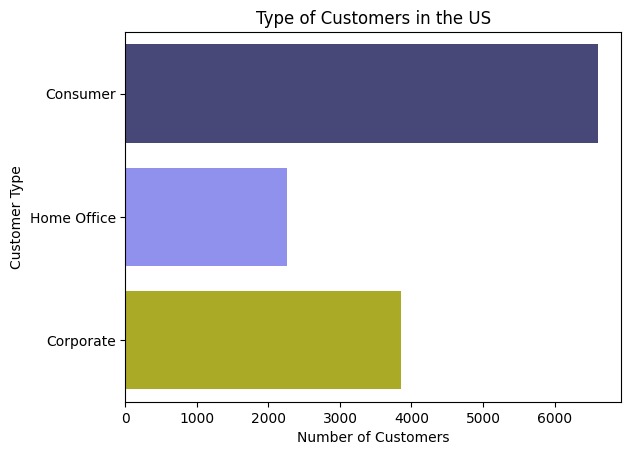

In [38]:
sns.countplot(demographics, palette='gist_stern')

plt.title('Type of Customers in the US')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Type')
plt.show()

In [39]:
shipping_df = pd.read_csv('Shipping.csv')

shipping_df

,column1,Days_for_shipping_real,Days_for_shipment_scheduled,Delivery_Status,Late_delivery_risk,shipping_date_DateOrders,Shipping_Mode,Market,Order_Id
0,4316,5,4,Shipping canceled,0,2016-04-21 20:11:00.0000000,Standard Class,USCA,32324
1,4317,2,4,Shipping canceled,0,2016-05-29 00:20:00.0000000,Standard Class,USCA,35076
2,4318,4,4,Shipping canceled,0,2016-07-24 17:04:00.0000000,Standard Class,USCA,38823
3,4319,2,4,Shipping canceled,0,2016-06-04 12:14:00.0000000,Standard Class,USCA,35521
4,4320,4,4,Shipping canceled,0,2016-04-07 00:45:00.0000000,Standard Class,USCA,31378
...,...,...,...,...,...,...,...,...,...
8574,57823,4,2,Late delivery,1,2016-05-28 20:29:00.0000000,Second Class,USCA,34928
8575,57824,2,2,Shipping on time,0,2016-06-19 06:05:00.0000000,Second Class,USCA,36531
8576,57825,4,2,Late delivery,1,2016-11-24 09:43:00.0000000,Second Class,USCA,47228
8577,57826,5,2,Late delivery,1,2016-07-20 02:32:00.0000000,Second Class,USCA,38439


In [40]:
cancelled = shipping_df.groupby("Delivery_Status").count().sort_values(by=["column1"],ascending=False).iloc[0:5,:2]
cancelled.reset_index(inplace=True)

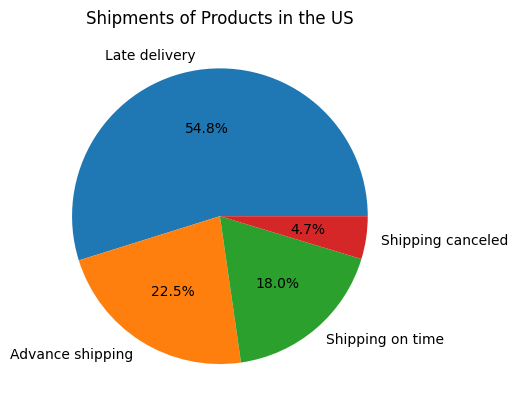

In [41]:
plt.pie(cancelled["column1"], labels=cancelled["Delivery_Status"], autopct='%1.1f%%')
plt.title('Shipments of Products in the US')
plt.show()

In [42]:
customer_df = customer_df[customer_df["column1"] != "n Run"]
customer_df["column1"] = customer_df["column1"].astype(int)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12719 entries, 0 to 12718
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column1            12719 non-null  int64  
 1   Customer_City      12719 non-null  object 
 2   Customer_Country   12719 non-null  object 
 3   Customer_Email     12719 non-null  object 
 4   Customer_Fname     12719 non-null  object 
 5   Customer_Id        12719 non-null  int64  
 6   Customer_Lname     12713 non-null  object 
 7   Customer_Password  12719 non-null  object 
 8   Customer_Segment   12719 non-null  object 
 9   Customer_State     12719 non-null  object 
 10  Customer_Street    12719 non-null  object 
 11  Customer_Zipcode   12716 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [43]:
merged_df = customer_df.merge(shipping_df, left_on=["column1"], right_on=["column1"], how="inner")
merged_df

,column1,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Days_for_shipping_real,Days_for_shipment_scheduled,Delivery_Status,Late_delivery_risk,shipping_date_DateOrders,Shipping_Mode,Market,Order_Id
0,18660,Hickory,EE. UU.,XXXXXXXXX,Melissa,10732,Robertson,XXXXXXXXX,Home Office,NC,9383 Jagged Front,28601.0,3,2,Late delivery,1,2017-01-09 12:59:00.0000000,Second Class,USCA,50457
1,18673,Tonawanda,EE. UU.,XXXXXXXXX,Shellie,18406,Clarke,XXXXXXXXX,Consumer,NY,1942 Middle Bluff Crescent,14150.0,2,4,Advance shipping,0,2016-11-30 07:57:00.0000000,Standard Class,USCA,47771
2,18680,Saint Paul,EE. UU.,XXXXXXXXX,Leila,17043,Sweet,XXXXXXXXX,Consumer,MN,4772 Indian Alley,55124.0,2,1,Late delivery,1,2016-11-13 09:33:00.0000000,First Class,USCA,46611
3,18702,Placentia,EE. UU.,XXXXXXXXX,Tara,15821,Dorsey,XXXXXXXXX,Consumer,CA,2897 Rustic Mountain Crest,92870.0,3,4,Advance shipping,0,2016-08-20 03:22:00.0000000,Standard Class,USCA,40702
4,18703,Portland,EE. UU.,XXXXXXXXX,Ella,15817,Workman,XXXXXXXXX,Consumer,OR,9726 Dewy Grounds,97206.0,2,1,Late delivery,1,2016-08-16 19:19:00.0000000,First Class,USCA,40542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,7901,Elyria,EE. UU.,XXXXXXXXX,Jonathan,4112,Martin,XXXXXXXXX,Consumer,OH,9430 Heather Mountain Farms,44035.0,3,2,Late delivery,1,2016-07-08 03:36:00.0000000,Second Class,USCA,37757
1811,7902,Pittsburg,EE. UU.,XXXXXXXXX,Mary,5410,Davis,XXXXXXXXX,Consumer,CA,9404 Crystal Island Acres,94565.0,4,2,Late delivery,1,2016-05-08 18:45:00.0000000,Second Class,USCA,33553
1812,7912,Miami,EE. UU.,XXXXXXXXX,James,4900,Trevino,XXXXXXXXX,Consumer,FL,6754 Iron Elk Road,33157.0,2,2,Shipping canceled,0,2016-07-16 00:58:00.0000000,Second Class,USCA,38366
1813,7913,Los Angeles,EE. UU.,XXXXXXXXX,Amber,5037,Pearson,XXXXXXXXX,Consumer,CA,1819 Noble Ramp,90016.0,4,2,Late delivery,1,2016-07-23 11:17:00.0000000,Second Class,USCA,38738


In [44]:
merged_df["Delivery_Range"] = merged_df["Days_for_shipping_real"] - merged_df["Days_for_shipment_scheduled"]
merged_df

,column1,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,...,Customer_Zipcode,Days_for_shipping_real,Days_for_shipment_scheduled,Delivery_Status,Late_delivery_risk,shipping_date_DateOrders,Shipping_Mode,Market,Order_Id,Delivery_Range
0,18660,Hickory,EE. UU.,XXXXXXXXX,Melissa,10732,Robertson,XXXXXXXXX,Home Office,NC,...,28601.0,3,2,Late delivery,1,2017-01-09 12:59:00.0000000,Second Class,USCA,50457,1
1,18673,Tonawanda,EE. UU.,XXXXXXXXX,Shellie,18406,Clarke,XXXXXXXXX,Consumer,NY,...,14150.0,2,4,Advance shipping,0,2016-11-30 07:57:00.0000000,Standard Class,USCA,47771,-2
2,18680,Saint Paul,EE. UU.,XXXXXXXXX,Leila,17043,Sweet,XXXXXXXXX,Consumer,MN,...,55124.0,2,1,Late delivery,1,2016-11-13 09:33:00.0000000,First Class,USCA,46611,1
3,18702,Placentia,EE. UU.,XXXXXXXXX,Tara,15821,Dorsey,XXXXXXXXX,Consumer,CA,...,92870.0,3,4,Advance shipping,0,2016-08-20 03:22:00.0000000,Standard Class,USCA,40702,-1
4,18703,Portland,EE. UU.,XXXXXXXXX,Ella,15817,Workman,XXXXXXXXX,Consumer,OR,...,97206.0,2,1,Late delivery,1,2016-08-16 19:19:00.0000000,First Class,USCA,40542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,7901,Elyria,EE. UU.,XXXXXXXXX,Jonathan,4112,Martin,XXXXXXXXX,Consumer,OH,...,44035.0,3,2,Late delivery,1,2016-07-08 03:36:00.0000000,Second Class,USCA,37757,1
1811,7902,Pittsburg,EE. UU.,XXXXXXXXX,Mary,5410,Davis,XXXXXXXXX,Consumer,CA,...,94565.0,4,2,Late delivery,1,2016-05-08 18:45:00.0000000,Second Class,USCA,33553,2
1812,7912,Miami,EE. UU.,XXXXXXXXX,James,4900,Trevino,XXXXXXXXX,Consumer,FL,...,33157.0,2,2,Shipping canceled,0,2016-07-16 00:58:00.0000000,Second Class,USCA,38366,0
1813,7913,Los Angeles,EE. UU.,XXXXXXXXX,Amber,5037,Pearson,XXXXXXXXX,Consumer,CA,...,90016.0,4,2,Late delivery,1,2016-07-23 11:17:00.0000000,Second Class,USCA,38738,2


In [45]:
delivery_turnaround = merged_df.groupby("Customer_State")["Delivery_Range"].mean().reset_index().sort_values(by=["Delivery_Range"],ascending=False).iloc[0:10,::]
delivery_turnaround

,Customer_State,Delivery_Range
12,ID,2.250000
38,UT,1.214286
27,NM,1.083333
14,IN,1.000000
23,MT,1.000000
34,RI,1.000000
11,IA,1.000000
15,KS,0.800000
4,CO,0.774194
30,OH,0.760563


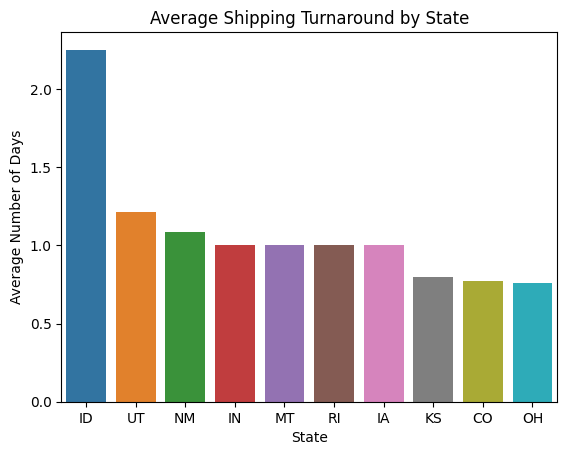

In [46]:
sns.barplot(x = delivery_turnaround["Customer_State"], y = delivery_turnaround["Delivery_Range"], hue=delivery_turnaround["Customer_State"])
plt.title("Average Shipping Turnaround by State")
plt.ylabel('Average Number of Days')
plt.xlabel('State')
plt.show()

In [47]:
cancelled_by_state = merged_df.groupby(["Customer_State", "Delivery_Status"]).count().reset_index().sort_values(by=["column1"],ascending=False)#.iloc[0:10,::]
cancelled_by_state = cancelled_by_state[cancelled_by_state["Customer_State"].isin(["CA", "NY", "TX", "IL", "FL"])]

cancelled_by_state

,Customer_State,Delivery_Status,column1,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,...,Customer_Street,Customer_Zipcode,Days_for_shipping_real,Days_for_shipment_scheduled,Late_delivery_risk,shipping_date_DateOrders,Shipping_Mode,Market,Order_Id,Delivery_Range
9,CA,Late delivery,267,267,267,267,267,267,267,267,...,267,267,267,267,267,267,267,267,267,267
8,CA,Advance shipping,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
11,CA,Shipping on time,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
96,NY,Late delivery,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
42,IL,Late delivery,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
125,TX,Late delivery,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
95,NY,Advance shipping,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
27,FL,Late delivery,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
98,NY,Shipping on time,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
124,TX,Advance shipping,34,34,34,34,34,34,33,34,...,34,34,34,34,34,34,34,34,34,34


<ipython-input-48-86b362b3252d>:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(x = cancelled_by_state["Customer_State"], y = cancelled_by_state["column1"], hue=cancelled_by_state["Delivery_Status"], data=cancelled_by_state, palette=sns.color_palette("gist_stern"))


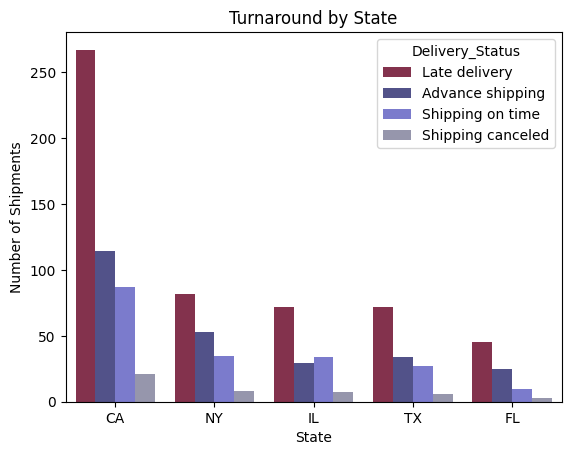

In [48]:
sns.barplot(x = cancelled_by_state["Customer_State"], y = cancelled_by_state["column1"], hue=cancelled_by_state["Delivery_Status"], data=cancelled_by_state, palette=sns.color_palette("gist_stern"))
plt.title("Turnaround by State")
plt.ylabel('Number of Shipments')
plt.xlabel('State')
plt.show()

In [49]:
orders = pd.read_csv('Order_Data.csv')

orders = orders[['column1', 'Order_Customer_Id', 'Order_Id', 'Order_Item_Cardprod_Id', 'Order_Region', 'Order_State', 'order_date_DateOrders', 'Sales', 'Type']]
orders

,column1,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Region,Order_State,order_date_DateOrders,Sales,Type
0,55,3296,36146,278,West of USA,Washington,2016-06-11 15:12:00.0000000,89.980003,PAYMENT
1,56,3182,41234,249,West of USA,California,2016-08-24 21:45:00.0000000,109.940002,PAYMENT
2,57,7864,32090,365,West of USA,California,2016-04-13 10:12:00.0000000,119.980003,PAYMENT
3,58,11169,34773,365,US Center,Kansas,2016-05-22 14:10:00.0000000,119.980003,PAYMENT
4,183,1509,33824,278,US Center,Texas,2016-05-08 17:42:00.0000000,134.970001,TRANSFER
...,...,...,...,...,...,...,...,...,...
20790,160973,3015,38032,957,West of USA,California,2016-07-09 03:57:00.0000000,299.980011,TRANSFER
20791,160975,1877,37417,957,West of USA,Oregón,2016-06-30 04:29:00.0000000,299.980011,TRANSFER
20792,160977,6162,31797,957,West of USA,Colorado,2016-04-09 03:33:00.0000000,299.980011,TRANSFER
20793,160978,10888,36596,957,West of USA,California,2016-06-18 04:51:00.0000000,299.980011,TRANSFER


In [50]:
orders_by_region = orders.groupby("Order_Region").count().sort_values(by=["column1"],ascending=False).iloc[0:5,:2]
orders_by_region

,column1,Order_Customer_Id
Order_Region,,
West of USA,7993,7993
East of USA,6915,6915
US Center,5887,5887


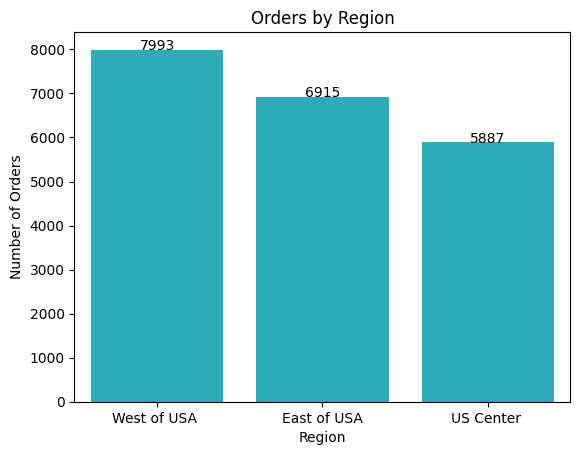

In [51]:
sns.barplot(x = orders_by_region.index, y = orders_by_region["column1"], color=sns.color_palette()[9])
xlabel=plt.xlabel('Region')
ylabel=plt.ylabel('Number of Orders')
plt.title('Orders by Region')
for i in enumerate(orders_by_region["column1"]):
    plt.text(i[0], i[1], i[1], ha='center')
plt.show()

In [52]:
orders_by_state = orders.groupby("Order_State").count().sort_values(by=["column1"],ascending=False).iloc[0:5,:2]
orders_by_state

,column1,Order_Customer_Id
Order_State,,
California,4966,4966
Nueva York,2753,2753
Texas,2446,2446
Pensilvania,1406,1406
Washington,1272,1272


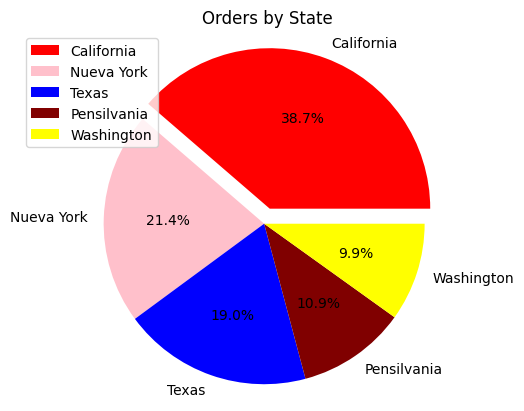

In [53]:
plt.pie(orders_by_state["column1"], labels=orders_by_state.index, autopct='%1.1f%%', colors=["red", "pink", "blue", "maroon", "yellow"], explode=(0.1, 0, 0, 0, 0))
plt.axis('equal')
plt.title('Orders by State')
plt.legend(loc = 'upper left')
plt.show()

In [54]:
sales = orders[['Sales', 'Order_State']]
sales

,Sales,Order_State
0,89.980003,Washington
1,109.940002,California
2,119.980003,California
3,119.980003,Kansas
4,134.970001,Texas
...,...,...
20790,299.980011,California
20791,299.980011,Oregón
20792,299.980011,Colorado
20793,299.980011,California


In [55]:
top_5 = sales.groupby('Order_State').sum().head(5).sort_values(by='Sales', ascending=False).round(2)
top_5

,Sales
Order_State,
California,984826.65
Arizona,107966.89
Colorado,92701.73
Connecticut,38804.01
Dakota del Norte,3816.35


In [56]:
orders['Sales'].sum()

4093883.7216854095

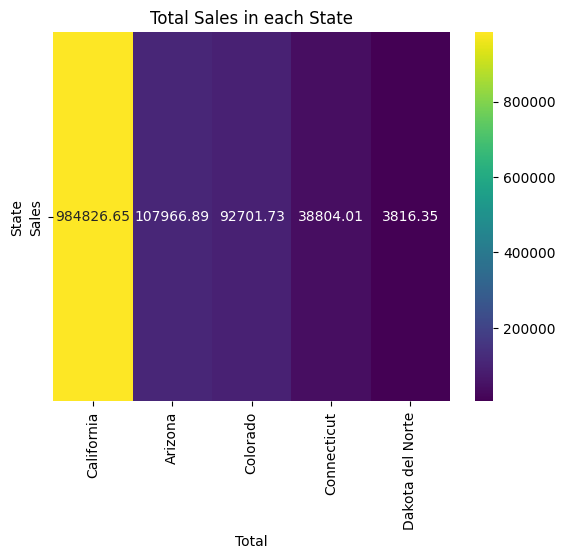

In [57]:
top_5 = top_5.T
sns.heatmap(top_5, annot=True, cmap="viridis", fmt=".2f")
xlabel=plt.xlabel('Total')
ylabel=plt.ylabel('State')
plt.title('Total Sales in each State')
plt.show()

In [58]:
products = pd.read_csv('ProductData.csv')

products

,column1,Category_Id,Category_Name,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status
0,0,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0
1,1,17,Cleats,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0
2,2,29,Shop By Sport,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0
3,3,24,Women's Apparel,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0
4,4,13,Electronics,278,13,NaN,http://images.acmesports.sports/Under+Armour+M...,Under Armour Men's Compression EV SL Slide,44.990002,0
...,...,...,...,...,...,...,...,...,...,...
113,113,30,Men's Golf Clubs,646,30,NaN,http://images.acmesports.sports/Merrell+Women%...,Merrell Women's Grassbow Sport Hiking Shoe,99.989998,0
114,114,74,Toys,1361,74,NaN,http://images.acmesports.sports/Toys,Toys,11.540000,0
115,115,48,Water Sports,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0
116,116,48,Water Sports,1059,48,NaN,http://images.acmesports.sports/Pelican+Maveri...,Pelican Maverick 100X Kayak,349.989990,0


In [59]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   column1              118 non-null    int64  
 1   Category_Id          118 non-null    int64  
 2   Category_Name        118 non-null    object 
 3   Product_Card_Id      118 non-null    int64  
 4   Product_Category_Id  118 non-null    int64  
 5   Product_Description  0 non-null      float64
 6   Product_Image        118 non-null    object 
 7   Product_Name         118 non-null    object 
 8   Product_Price        118 non-null    float64
 9   Product_Status       118 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 9.3+ KB


In [60]:
products_df = products[['column1', 'Category_Id', 'Category_Name', 'Product_Category_Id', 'Product_Name', 'Product_Card_Id']].copy()
products_df

,column1,Category_Id,Category_Name,Product_Category_Id,Product_Name,Product_Card_Id
0,0,73,Sporting Goods,73,Smart watch,1360
1,1,17,Cleats,17,Perfect Fitness Perfect Rip Deck,365
2,2,29,Shop By Sport,29,Under Armour Girls' Toddler Spine Surge Runni,627
3,3,24,Women's Apparel,24,Nike Men's Dri-FIT Victory Golf Polo,502
4,4,13,Electronics,13,Under Armour Men's Compression EV SL Slide,278
...,...,...,...,...,...,...
113,113,30,Men's Golf Clubs,30,Merrell Women's Grassbow Sport Hiking Shoe,646
114,114,74,Toys,74,Toys,1361
115,115,48,Water Sports,48,Pelican Sunstream 100 Kayak,1073
116,116,48,Water Sports,48,Pelican Maverick 100X Kayak,1059


In [61]:

orders.rename(columns={"Order_Item_Cardprod_Id" : "Product_Card_Id"}, inplace=True)
orders.sort_values(by=["Product_Card_Id"], ascending=True)

,column1,Order_Customer_Id,Order_Id,Product_Card_Id,Order_Region,Order_State,order_date_DateOrders,Sales,Type
1918,14371,552,39146,37,US Center,Texas,2016-07-25 10:14:00.0000000,104.970001,DEBIT
4715,43851,3914,34926,37,East of USA,Ohio,2016-05-24 19:46:00.0000000,174.949997,DEBIT
20207,158638,3474,38779,37,East of USA,Nueva York,2016-07-20 01:39:00.0000000,139.960007,TRANSFER
15640,135778,1462,37440,37,East of USA,Connecticut,2016-06-30 12:32:00.0000000,69.980003,TRANSFER
15068,141090,8707,32122,37,West of USA,California,2016-04-13 21:25:00.0000000,174.949997,CASH
...,...,...,...,...,...,...,...,...,...
8139,78522,11755,38454,1073,West of USA,California,2016-07-15 07:47:00.0000000,199.990005,DEBIT
8140,78524,2065,38448,1073,West of USA,Arizona,2016-07-15 05:41:00.0000000,199.990005,DEBIT
8141,78527,10938,38437,1073,US Center,Misuri,2016-07-15 01:50:00.0000000,199.990005,DEBIT
8128,78511,9501,38513,1073,West of USA,California,2016-07-16 04:28:00.0000000,199.990005,DEBIT


In [62]:
products_df.sort_values(by=['Product_Card_Id'], ascending=True)

,column1,Category_Id,Category_Name,Product_Category_Id,Product_Name,Product_Card_Id
87,87,2,Soccer,2,Nike Men's Fingertrap Max Training Shoe,19
22,22,2,Soccer,2,Elevation Training Mask 2.0,24
83,83,3,Baseball & Softball,3,adidas Brazuca 2014 Official Match Ball,35
51,51,3,Baseball & Softball,3,adidas Kids' F5 Messi FG Soccer Cleat,37
14,14,3,Baseball & Softball,3,adidas Men's F10 Messi TRX FG Soccer Cleat,44
...,...,...,...,...,...,...
75,75,72,Pet Supplies,72,Adult dog supplies,1359
0,0,73,Sporting Goods,73,Smart watch,1360
114,114,74,Toys,74,Toys,1361
79,79,75,Video Games,75,Fighting video games,1362


In [63]:
merged_df = orders.merge(products_df, left_on=["Product_Card_Id"], right_on=["Product_Card_Id"], how="inner")
merged_df

,column1_x,Order_Customer_Id,Order_Id,Product_Card_Id,Order_Region,Order_State,order_date_DateOrders,Sales,Type,column1_y,Category_Id,Category_Name,Product_Category_Id,Product_Name
0,55,3296,36146,278,West of USA,Washington,2016-06-11 15:12:00.0000000,89.980003,PAYMENT,4,13,Electronics,13,Under Armour Men's Compression EV SL Slide
1,183,1509,33824,278,US Center,Texas,2016-05-08 17:42:00.0000000,134.970001,TRANSFER,4,13,Electronics,13,Under Armour Men's Compression EV SL Slide
2,9826,3192,39961,278,West of USA,California,2016-08-06 07:46:00.0000000,134.970001,TRANSFER,4,13,Electronics,13,Under Armour Men's Compression EV SL Slide
3,1914,7175,35389,278,East of USA,Ohio,2016-05-31 13:59:00.0000000,224.949997,TRANSFER,4,13,Electronics,13,Under Armour Men's Compression EV SL Slide
4,8632,9206,35876,278,East of USA,Nueva York,2016-06-07 16:36:00.0000000,44.990002,DEBIT,4,13,Electronics,13,Under Armour Men's Compression EV SL Slide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20790,153324,94,31318,1004,US Center,Nebraska,2016-04-02 03:44:00.0000000,399.980011,TRANSFER,58,45,Fishing,45,Field & Stream Sportsman 16 Gun Fire Safe
20791,153325,12248,31314,1004,West of USA,Utah,2016-04-02 02:20:00.0000000,399.980011,TRANSFER,58,45,Fishing,45,Field & Stream Sportsman 16 Gun Fire Safe
20792,153326,9190,31306,1004,West of USA,California,2016-04-01 23:32:00.0000000,399.980011,PAYMENT,58,45,Fishing,45,Field & Stream Sportsman 16 Gun Fire Safe
20793,153327,9190,31306,1004,West of USA,California,2016-04-01 23:32:00.0000000,399.980011,PAYMENT,58,45,Fishing,45,Field & Stream Sportsman 16 Gun Fire Safe


In [64]:
merged_df.sort_values(by=['Product_Card_Id'], ascending=True)



,column1_x,Order_Customer_Id,Order_Id,Product_Card_Id,Order_Region,Order_State,order_date_DateOrders,Sales,Type,column1_y,Category_Id,Category_Name,Product_Category_Id,Product_Name
13377,21570,7031,39190,37,East of USA,Nueva York,2016-07-26 01:39:00.0000000,34.990002,DEBIT,51,3,Baseball & Softball,3,adidas Kids' F5 Messi FG Soccer Cleat
13388,67192,7960,37952,37,West of USA,Arizona,2016-07-07 23:55:00.0000000,69.980003,DEBIT,51,3,Baseball & Softball,3,adidas Kids' F5 Messi FG Soccer Cleat
13387,57645,6928,37991,37,US Center,Wisconsin,2016-07-08 13:35:00.0000000,139.960007,DEBIT,51,3,Baseball & Softball,3,adidas Kids' F5 Messi FG Soccer Cleat
13386,62485,478,31690,37,US Center,Illinois,2016-04-07 14:04:00.0000000,174.949997,TRANSFER,51,3,Baseball & Softball,3,adidas Kids' F5 Messi FG Soccer Cleat
13385,42969,9687,31881,37,West of USA,Colorado,2016-04-10 08:59:00.0000000,69.980003,DEBIT,51,3,Baseball & Softball,3,adidas Kids' F5 Messi FG Soccer Cleat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15770,79018,5536,36250,1073,East of USA,Nueva York,2016-06-13 03:38:00.0000000,199.990005,DEBIT,115,48,Water Sports,48,Pelican Sunstream 100 Kayak
15771,79019,12,36246,1073,West of USA,California,2016-06-13 02:14:00.0000000,199.990005,PAYMENT,115,48,Water Sports,48,Pelican Sunstream 100 Kayak
15772,79020,10231,36241,1073,West of USA,California,2016-06-13 00:29:00.0000000,199.990005,DEBIT,115,48,Water Sports,48,Pelican Sunstream 100 Kayak
15760,79005,10264,36292,1073,East of USA,Nueva York,2016-06-13 18:21:00.0000000,199.990005,DEBIT,115,48,Water Sports,48,Pelican Sunstream 100 Kayak
